# Seminar 2.1: Monopol og prisdiskriminering, to-delt tariff

Vi skal se på en monopolist som selger til to forskjellige grupper av kunder. Monopolisten har to ulike priser, $P_u$ og $P_v$, for de to gruppene. Vi skal se på hvordan monopolisten bestemmer prisen og kvantummet for de to gruppene, og hvordan monopolisten kan maksimere profitten sin ved å bruke en to-delt tariff.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Eksempelet vi bruker er et skisenter som har to grupper av kunder: Unge og voksne. Vi antar at etterspørselen etter heisturer for de to gruppene er gitt ved følgende etterspørselsfunksjoner:

$$
Q_u = 16 - P_u
$$
$$
Q_v = 12 - P_v
$$

hvor $u$ er benevnelsen for unge og $v$ står for voksen.

Vi finner invers etterspørsel ved å løse for $P_u$ og $P_v$:

$$
P_u = 16 - Q_u
$$

$$
P_v = 12 - Q_v
$$


In [2]:
# Definerer symboler, u står for ung og v står for voksen
Q_u, Q_v, P_u, P_v = sp.symbols('Q_u Q_v P_u P_v')

# Definerer etterspørselsfunksjonene
Etterspørsel_ung = sp.Eq(Q_u, 16-P_u)
Etterspørsel_voksen = sp.Eq(Q_v, 12-P_v)

display(Etterspørsel_ung, Etterspørsel_voksen)

Eq(Q_u, 16 - P_u)

Eq(Q_v, 12 - P_v)

In [3]:
# Løser for den inverse etterspørselsfunksjonen
P_u = sp.solve(Etterspørsel_ung, P_u)[0]
P_v = sp.solve(Etterspørsel_voksen, P_v)[0]

display(P_u, P_v)

16 - Q_u

12 - Q_v

## Optimal tilpasning for yngre kunder

For å maksimere profitten må monopolisten sette marginalkostnaden lik marginalinntekten:

$$
MC = MR
$$

Marginalkostnaden per heistur er lik i begge kundegruppene, og er gitt ved:

$$
MC = 4
$$

Deretter finner vi totalinntekten til monopolisten for den yngste kundegruppen ved å multiplisere invers etterspørsel $P_u$ med kvantum $Q_u$:

$$
TR_u = P_u \cdot Q_u
$$

og til slutt deriverer vi totalinntekten for unge, $TR_u$ med hensyn på kvantum $Q_u$:

$$
MR_u = \frac{dTR_u}{dQ_u} = MR_u = 16-2Q_u
$$

In [4]:
# Finner totalinntekten for unge
TR_u = Q_u*P_u

# Deriverer totalinntekten for unge med hensyn på kvantum
MR_u = TR_u.diff(Q_u)

display(TR_u, MR_u)

Q_u*(16 - Q_u)

16 - 2*Q_u

Nå har vi marginalkostnad per heistur og regnet ut marginalinntekten for de yngre. For å finne optimal tilpasning for monopolisten setter vi disse lik hverandre, $MR = MC$:

$$
16 - 2Q_u = 4
$$

Vi løser for kvantum $Q_u$ og får:

$$
Q{_u^*} = 6
$$

Så setter vi inn løsningen for kvantum i den inverse etterspørselsfunksjonen for unge og finner den optimale løsningen for $P_u$:

$$
P{_u^*} = 16 - 6 = 10
$$

Og profitten finnes ved å sette optimalt kvantum inn i totalinntekten og trekke fra marginalkostnad multiplisert ved optimalt kvantum:

$$
\pi_u = TR{_u^*} - MC*Q{_U^*} = 60 - 24 = 36
$$


Det vi finner er at monopolisten med etterspørselen til unge bør selge 6 heisturer til en pris av 10, og profitten blir 36.

In [5]:
# Definerer marginalkostnaden
MC = 4

# Setter MR lik MC
likevekt_u = sp.Eq(MR_u, MC)

display(likevekt_u)

Eq(16 - 2*Q_u, 4)

In [6]:
# Løser for kvantum
Q_u_løsning = sp.solve(likevekt_u, Q_u)[0]

# Setter kvantum inn i etterspørselsfunksjonen for unge
P_u_løsning = P_u.subs(Q_u, Q_u_løsning)

# Finner profitten
profitt_u = TR_u.subs(Q_u, Q_u_løsning) - MC*Q_u_løsning

f'Optimalt kvantum blir {Q_u_løsning}, optimal pris blir {P_u_løsning} og profitten er {profitt_u} for unge'

'Optimalt kvantum blir 6, optimal pris blir 10 og profitten er 36 for unge'

## Konsumentoverskudd

Vi kan også finne konsumentoverskuddet til monopolisten. Konsumentoverskuddet er arealet mellom etterspørselskurven og prisen som konsumentene betaler. For å finne konsumentoverskuddet til unge, kan vi ta å regne dette ut ved hjelp av integralet av etterspørselskurven til unge fra 0 til 6:

$$
Konsumentoverskudd_u = \int_0^6 (16 - Q_u) \partial Q_u - P{_u^*} \cdot Q{_u^*} = 78 - 60 = 18
$$


In [7]:
## Finner konsumentoverskuddet for unge
Konsumentoverskudd_u = sp.integrate(P_u-P_u_løsning, (Q_u, 0, Q_u_løsning))

display(Konsumentoverskudd_u)

18

## Visualisering av pris, kvantum og konsumentoverskudd

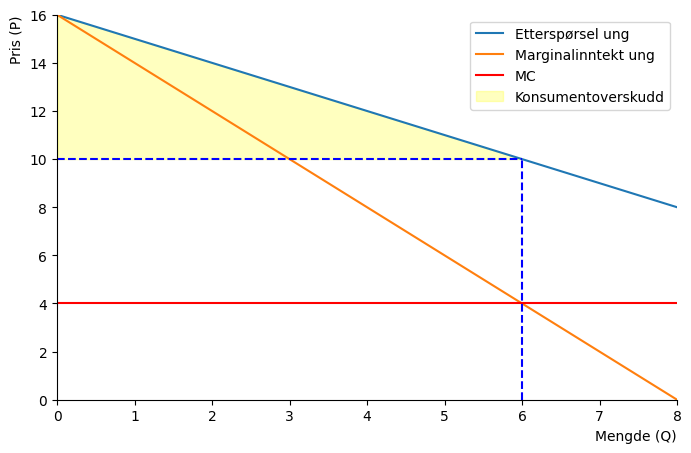

In [8]:
# Invers etterspørsel funksjon
def invers(a,b,Q):
    return a - (b*Q)
# Marginalinntekt funksjon
def marginal_rev(a,b,Q):
    return a - (2*b*Q)

# Marginalkostnad er definert tidligere og er lik 4

Q = np.linspace(0, 8, 100)

# Fyller området under etterspørselskurven
Q_fill_u = np.linspace(0.01, 6, 100)

#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots(figsize=(8, 5))
                ax.set_ylabel('Pris (P)', loc='top', rotation=90)
                ax.set_xlabel('Mengde (Q)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                return fig, ax
            
fig, ax = create_ax()

# Plotter etterspørselskurvene
ax.plot(Q, invers(16,1,Q), label='Etterspørsel ung')
# Plotter marginalinntekten
ax.plot(Q, marginal_rev(16,1,Q), label='Marginalinntekt ung')
# Plotter marginalkostnaden
ax.axhline(y=4, color='r', label='MC')

#h og vlines til likevekt
ax.vlines(x=Q_u_løsning, ymin = 0, ymax= P_u_løsning, color='b', linestyle='--')
ax.hlines(y=P_u_løsning, xmin=0,xmax=Q_u_løsning, color='b', linestyle='--')

# Farger konsumentoverskuddet
ax.fill_between(Q_fill_u, invers(16,1,Q_fill_u), 10, color='yellow', alpha=0.25, label='Konsumentoverskudd')

ax.set(xlim=(0, 8))
ax.set(ylim=(0, 16))

ax.legend();

## Optimal tilpasning for voksne kunder

Finner totalinnkten til monopolisten for den eldste kundegruppen ved å multiplisere invers etterspørsel $P_v$ med kvantum $Q_v$:

$$
TR_v = P_v \cdot Q_v
$$

Deriverer totalinntekten for voksne, $TR_v$ med hensyn på kvantum $Q_v$:

$$
MR_v = \frac{dTR_v}{dQ_v} = MR_v = 12-2Q_v
$$

Marginalkostnad vet vi er lik 4.

In [9]:
# Finner totalinntekten for voksne
TR_v = Q_v*P_v

# Deriverer totalinntekten for voksne med hensyn på kvantum
MR_v = TR_v.diff(Q_v)

display(TR_v, MR_v)

Q_v*(12 - Q_v)

12 - 2*Q_v

Nå har vi både marginalkostnad og marginalinntekt for de voksne. For å finne optimal tilpasning for monopolisten setter vi disse lik hverandre, $MR = MC$:

$$
12 - 2Q_v = 4
$$

Vi løser for kvantum $Q_v$ og får:

$$
Q{_v^*} = 4
$$

Så setter vi inn løsningen for kvantum i den inverse etterspørselsfunksjonen for voksne og finner den optimale løsningen for $P_v$:

$$
P{_v^*} = 12 - 4 = 8
$$

Og profitten finnes ved å sette optimalt kvantum inn i totalinntekten og trekke fra marginalkostnad multiplisert ved optimalt kvantum:

$$
\pi_v = TR{_v^*} - MC*Q{_v^*} = 32 - 16 = 16
$$

Det vi finner er at monopolisten med etterspørselen til voksne bør selge 4 heisturer til en pris av 8, og profitten blir 16.

In [10]:
# Setter MR lik MC
likevekt_v = sp.Eq(MR_v, MC)

display(likevekt_v)

Eq(12 - 2*Q_v, 4)

In [11]:
# Løser for kvantum
Q_v_løsning = sp.solve(likevekt_v, Q_v)[0]

# Setter kvantum inn i etterspørselsfunksjonen for voksne
P_v_løsning = P_v.subs(Q_v, Q_v_løsning)

# Finner profitten
profitt_v = TR_v.subs(Q_v, Q_v_løsning) - MC*Q_v_løsning

f'Optimalt kvantum blir {Q_v_løsning}, optimal pris blir {P_v_løsning} og profitten er {profitt_v} for voksne'

'Optimalt kvantum blir 4, optimal pris blir 8 og profitten er 16 for voksne'

## Konsumentoverskudd

Vi kan også finne konsumentoverskuddet til monopolisten. Konsumentoverskuddet er arealet mellom etterspørselskurven og prisen som konsumentene betaler. For å finne konsumentoverskuddet til voksne, kan vi ta å regne dette ut ved hjelp av integralet av etterspørselskurven til voksne fra 0 til 4:

$$
Konsumentoverskudd_v = \int_0^4 (12 - Q_v) \partial Q_v - P{_v^*} \cdot Q{_v^*} = 40 - 32 = 8
$$

In [12]:
# Finner konsumentoverskuddet for voksne
Konsumentoverskudd_v = sp.integrate(P_v-P_v_løsning, (Q_v, 0, Q_v_løsning))

display(Konsumentoverskudd_v)

8

## Visualisering av pris, kvantum og konsumentoverskudd

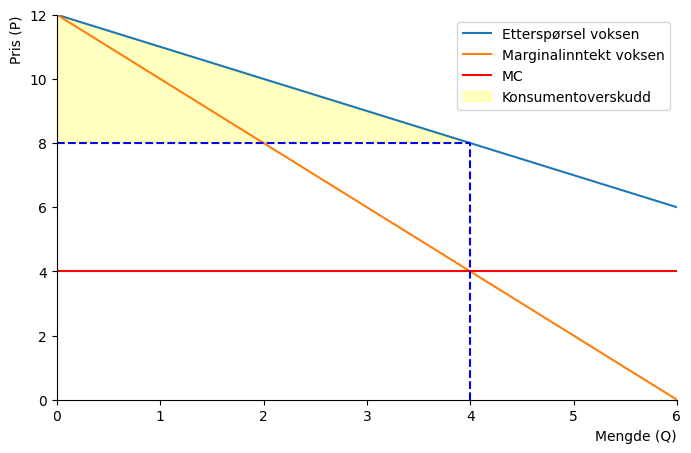

In [13]:
Q = np.linspace(0, 6, 100)

Q_fill_v = np.linspace(0.01, 4, 100)

fig, ax = create_ax()

# Plotter etterspørselskurvene
ax.plot(Q, invers(12,1,Q), label='Etterspørsel voksen')
# Plotter marginalinntekten
ax.plot(Q, marginal_rev(12,1,Q), label='Marginalinntekt voksen')
# Plotter marginalkostnaden
ax.axhline(y=4, color='r', label='MC')

#h og vlines til likevekt
ax.vlines(x=Q_v_løsning, ymin = 0, ymax= P_v_løsning, color='b', linestyle='--')
ax.hlines(y=P_v_løsning, xmin=0,xmax=Q_v_løsning, color='b', linestyle='--')

# Farger konsumentoverskuddet
ax.fill_between(Q_fill_v, invers(12,1,Q_fill_v), 8, color='yellow', alpha=0.25, label='Konsumentoverskudd')

ax.set(xlim=(0, 6))
ax.set(ylim=(0, 12))

ax.legend();

## To-delt tariff

En to-delt tariff er en prisstruktur hvor kundene betaler en pris for å få tilgang til markedet (inngangspris), og en pris per enhet for det de kjøper (pris per heistur). For å finne den optimale to-delt tariffen for monopolisten, må vi først finne ut hvor mange enheter hver kundegruppe kjøper ved å sette prisen for heisturen lik marginalkostnaden.

Fra før for unge vet vi at den inverse etterspørselfunksjonen er $P_u = 16 - Q_u$. Vi lager en ny likevektsbetingelse og setter den inverse etterspørselen (pris per heistur) lik marginalkostnaden:

$$
P_u = MC
$$

Dette blir da:

$$
16 - Q_u = 4
$$

Vi løser for kvantum $Q_u$ og får optimalt kvantum for unge:

$$
Q{_u^*} = 12
$$

Så setter vi inn løsningen for kvantum i den inverse etterspørselsfunksjonen for unge og finner den optimale løsningen for $P_u$:

$$
P{_u^*} = 16 - 12 = 4
$$

Prisen for inngang tar vi fra konsumentoverskuddet til unge, men vi må beregne dette på nytt siden vi har en ny pris for heisturen:

$$
Konsumentoverskudd_u = \int_0^{12} (16 - Q_u) \partial Q_u - P{_u^*} \cdot Q{_u^*} = 120 - 48 = 72 
$$

Konsumentoverskuddet er også profitten til monopolisten, så vi kan også si at profitten blir:

$$
\pi_u = 72
$$

To-delt tariff for unge blir da:

$$
T_u = 72 +  4Q{_u^*}
$$

$$
R_u = 72 + 4 \cdot 12 = 120
$$




In [14]:
# Lager ny likevektsbetingelse for unge
likevekt_u = sp.Eq(P_u, MC)

# Løser for kvantum
Q_u_løsning = sp.solve(likevekt_u, Q_u)[0]

# Setter kvantum inn i etterspørselsfunksjonen for unge
P_u_løsning = P_u.subs(Q_u, Q_u_løsning)

# Konsumentoverskuddet for unge
Konsumentoverskudd_u = sp.integrate(P_u-P_u_løsning, (Q_u, 0, Q_u_løsning))

f'Optimalt kvantum blir {Q_u_løsning}, optimal pris blir {P_u_løsning} og konsumentoverskuddet/profitten er {Konsumentoverskudd_u} for unge'

'Optimalt kvantum blir 12, optimal pris blir 4 og konsumentoverskuddet/profitten er 72 for unge'

## Visualisering av pris, kvantum og konsumentoverskudd ved to-delt tariff for unge

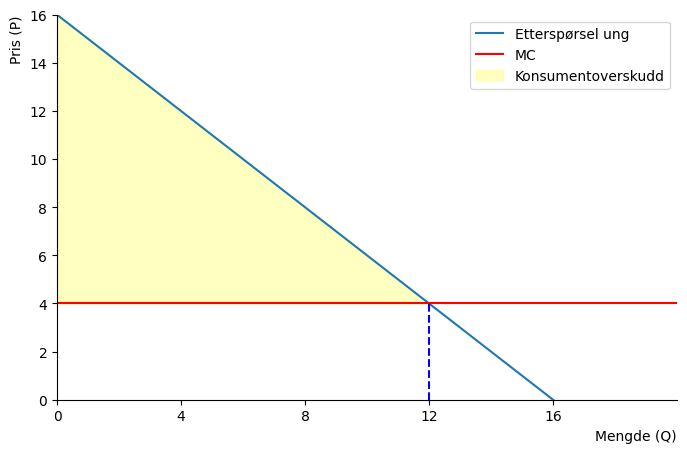

In [15]:
Q = np.linspace(0, 24, 100)

Q_fill_u = np.linspace(0.01, 12, 100)

fig, ax = create_ax()

# Plotter etterspørselskurvene
ax.plot(Q, invers(16,1,Q), label='Etterspørsel ung')


# Plotter marginalkostnaden
ax.axhline(y=4, color='r', label='MC')

#vlines til likevekt
ax.vlines(x=Q_u_løsning, ymin = 0, ymax= P_u_løsning, color='b', linestyle='--')

# Farger konsumentoverskuddet
ax.fill_between(Q_fill_u, invers(16,1,Q_fill_u), 4, color='yellow', alpha=0.25, label='Konsumentoverskudd')

ax.set(xlim=(0, 20))
ax.set(ylim=(0, 16))

# Fikser x-akse-ticks
ax.set_xticks(np.arange(0, 20, 4))

ax.legend();

For voksne vet vi at den inverse etterspørselfunksjonen er $P_v = 12 - Q_v$. Vi lager en ny likevektsbetingelse og setter den inverse etterspørselen (pris per heistur) lik marginalkostnaden:

$$
P_v = MC
$$

Dette blir da:

$$
12 - Q_v = 4
$$

Vi løser for kvantum $Q_v$ og får optimalt kvantum for voksne:

$$
Q{_v^*} = 8
$$

Så setter vi inn løsningen for kvantum i den inverse etterspørselsfunksjonen for voksne og finner den optimale løsningen for $P_v$:

$$
P{_v^*} = 12 - 8 = 4
$$

Prisen for inngang tar vi fra konsumentoverskuddet til voksne:

$$
Konsumentoverskudd_v = \int_0^{8} (12 - Q_v) \partial Q_v - P{_v^*} \cdot Q{_v^*} = 64 - 32 = 32
$$

Konsumentoverskuddet er også profitten til monopolisten, så vi kan også si at profitten blir:

$$
\pi_v = 32
$$

To-delt tariff for voksne blir da:

$$
T_v = 32 +  4Q{_v^*}
$$

$$
R_v = 32 + 4 \cdot 8 = 64
$$

In [16]:
# Lager ny likevektsbetingelse for voksne
likevekt_v = sp.Eq(P_v, MC)

# Løser for kvantum
Q_v_løsning = sp.solve(likevekt_v, Q_v)[0]

# Setter kvantum inn i etterspørselsfunksjonen for voksne
P_v_løsning = P_v.subs(Q_v, Q_v_løsning)

# Konsumentoverskuddet for voksne
Konsumentoverskudd_v = sp.integrate(P_v-P_v_løsning, (Q_v, 0, Q_v_løsning))

f'Optimalt kvantum blir {Q_v_løsning}, optimal pris blir {P_v_løsning} og konsumentoverskuddet/profitten er {Konsumentoverskudd_v} for voksne'

'Optimalt kvantum blir 8, optimal pris blir 4 og konsumentoverskuddet/profitten er 32 for voksne'

## Visualisering av pris, kvantum og konsumentoverskudd ved to-delt tariff for voksne

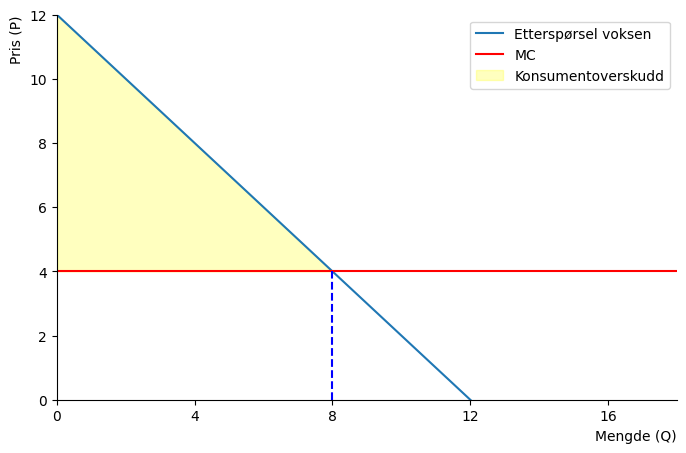

In [17]:
Q = np.linspace(0, 24, 100)

Q_fill_v = np.linspace(0.01, 8, 100)

fig, ax = create_ax()

# Plotter etterspørselskurvene
ax.plot(Q, invers(12,1,Q), label='Etterspørsel voksen')

# Plotter marginalkostnaden
ax.axhline(y=4, color='r', label='MC')

#vlines til likevekt
ax.vlines(x=Q_v_løsning, ymin = 0, ymax= P_v_løsning, color='b', linestyle='--')

# Farger konsumentoverskuddet
ax.fill_between(Q_fill_v, invers(12,1,Q_fill_v), 4, color='yellow', alpha=0.25, label='Konsumentoverskudd')

ax.set(xlim=(0, 18))
ax.set(ylim=(0, 12))

# Fikser x
ax.set_xticks(np.arange(0, 18, 4))

ax.legend();
